In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.spatial import distance
from scipy.signal import savgol_filter

%matplotlib inline

In [129]:
#Consts

joint_num = 60
label = 'unknown'

In [156]:
fname = "C://Users//user//Documents//Datasets//ParkinsonsDetectionDataset//PD_ON//118_ON_front.csv"
#fname = "C://Users//user//Documents//Datasets//ParkinsonsDetectionDataset//CONTROL//ID001-frontv-636745912297868841.csv"

idx = []

df_joint_data = pd.read_csv(fname, skipinitialspace=True).drop_duplicates().reset_index(drop=True)[:-5]

if 'drop_this_col' in df_joint_data.columns:
    del df_joint_data['drop_this_col']
    
for i in range(len(df_joint_data.index)):
    idx.append(i*0.033) #Could make this stochastic
    
df_index = pd.DataFrame({'time': idx})
df_joints = df_index.join(df_joint_data)

df_joints.set_index('time', inplace=True)

if (len(df_joints.columns)) > joint_num:
    df_joints.drop(df_joints.iloc[:, 60:1892], inplace=True, axis=1)

df_joints


,HipCenterXPosition,HipCenterYPosition,HipCenterZPosition,SpineXPosition,SpineYPosition,SpineZPosition,ShoulderCenterXPosition,ShoulderCenterYPosition,ShoulderCenterZPosition,HeadXPosition,...,HipRightZPosition,KneeRightXPosition,KneeRightYPosition,KneeRightZPosition,AnkleRightXPosition,AnkleRightYPosition,AnkleRightZPosition,FootRightXPosition,FootRightYPosition,FootRightZPosition
time,,,,,,,,,,,,,,,,,,,,,
0.000,0.118283,0.324852,3.437386,0.120254,0.376597,3.427342,0.130582,0.634360,3.390635,0.116313,...,3.430633,0.194623,-0.149413,3.567492,0.227956,-0.474254,3.739704,0.203725,-0.536154,3.693485
0.033,0.117220,0.314661,3.407886,0.118694,0.367582,3.399457,0.126715,0.631024,3.370466,0.115907,...,3.406208,0.194628,-0.153889,3.554581,0.188945,-0.512601,3.658038,0.172220,-0.568897,3.587462
0.066,0.114289,0.303562,3.389588,0.115948,0.355959,3.378377,0.124899,0.618110,3.333677,0.115906,...,3.390013,0.154310,-0.163682,3.501580,0.148623,-0.518165,3.616770,0.131897,-0.574603,3.546249
0.099,0.112066,0.287844,3.352628,0.114152,0.343064,3.344035,0.124347,0.616307,3.313471,0.112357,...,3.347932,0.135675,-0.200929,3.476656,0.129988,-0.555431,3.591857,0.107585,-0.572171,3.491085
0.132,0.110435,0.281039,3.333998,0.112041,0.335508,3.324440,0.119926,0.607256,3.291420,0.108454,...,3.332481,0.159688,-0.142688,3.446598,0.154001,-0.497212,3.561810,0.126306,-0.528847,3.466038
0.165,0.111761,0.275475,3.314155,0.113553,0.327970,3.305117,0.122813,0.587703,3.271980,0.111261,...,3.308334,0.126000,-0.211890,3.429151,0.120312,-0.566447,3.544378,0.095868,-0.585501,3.444465
0.198,0.097900,0.259615,3.269362,0.100325,0.315789,3.265733,0.112771,0.590156,3.255082,0.106912,...,3.258615,0.186025,-0.132165,3.415761,0.180771,-0.451155,3.600497,0.147761,-0.492459,3.510213
0.231,0.095667,0.252786,3.240759,0.097633,0.308481,3.231588,0.107675,0.588719,3.203073,0.103442,...,3.233814,0.176254,-0.140457,3.397060,0.170999,-0.459497,3.581831,0.134126,-0.507220,3.496320
0.264,0.091238,0.256347,3.205522,0.094298,0.312512,3.201447,0.107897,0.593115,3.188973,0.103406,...,3.194140,0.172571,-0.140756,3.360091,0.182163,-0.433358,3.580716,0.142997,-0.485670,3.498983


In [157]:
if "CONTROL" in fname: 
    label = 'NONE'
if "PD_ON" in fname: 
    label = 'REGULAR'
if "PD_OFF" in fname: 
    label = 'SEVERE'
    
print(label)

REGULAR


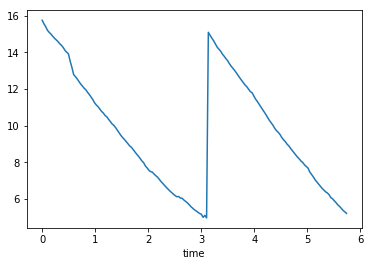

In [158]:
df_joints["magnitude"] = np.sqrt(np.square(df_joints).sum(axis=1))
df_joints["magnitude"].plot();

'threshold = 2.0\n\nfor row in df_joints.itertuples():\n    if row.COM_z > threshold:\n        df_joints.drop(row.Index, inplace=True)'

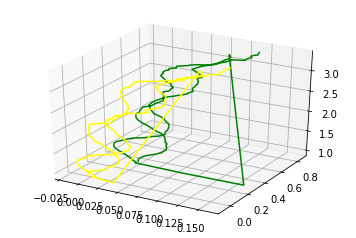

In [159]:
#Center of mass calculations

df_joints["COM_x"] = (df_joints["HipCenterXPosition"] + df_joints["SpineXPosition"] + df_joints["ShoulderCenterXPosition"])/3
df_joints["COM_y"] = (df_joints["HipCenterYPosition"] + df_joints["SpineYPosition"] + df_joints["ShoulderCenterYPosition"])/3
df_joints["COM_z"] = (df_joints["HipCenterZPosition"] + df_joints["SpineZPosition"] + df_joints["ShoulderCenterZPosition"])/3

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(df_joints.HeadXPosition, df_joints.HeadYPosition, df_joints.HeadZPosition, 'green')
ax.plot3D(df_joints.COM_x, df_joints.COM_y, df_joints.COM_z, 'yellow')

#remove frames with errors
"""threshold = 2.0

for row in df_joints.itertuples():
    if row.COM_z > threshold:
        df_joints.drop(row.Index, inplace=True)"""
        

In [160]:
#Data smoothing

for col in df_joints.columns:
    smoothed = savgol_filter(df_joints[col], 5, 2, mode='nearest') #Check correctness of paramters
    df_joints[col] = smoothed

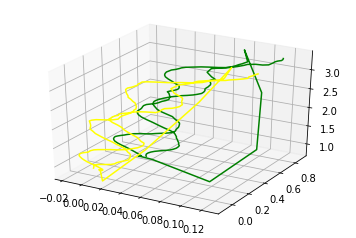

In [161]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(df_joints.HeadXPosition, df_joints.HeadYPosition, df_joints.HeadZPosition, 'green')
ax.plot3D(df_joints.COM_x, df_joints.COM_y, df_joints.COM_z, 'yellow')

In [162]:
def distance3D(x1,y1,z1,x2,y2,z2):
    return np.sqrt(np.square(x2 - x1) + np.square(y2 - y1) + np.square(z2 - z1))

def unit_vector(x, y, z):
    vector = np.array([x,y,z])
    return vector / np.linalg.norm(vector)

def angle_between(x1, y1, z1, x2, y2, z2):
    v1 = np.array([x1,y1,z1])
    v2 = np.array([x2,y2,z2])
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

1.1384297843836362
0.7454087361224984
0.9419192602530673


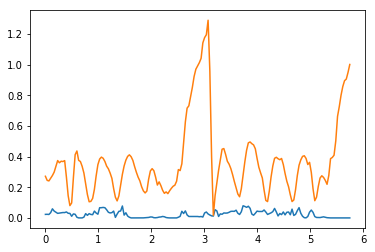

In [163]:
# Gait Cycle Analysis and Normalisation

right_leg_lower = 0
right_leg_upper = 0
left_leg_lower = 0
left_leg_upper = 0

distance_between_feet = 0
distance_between_feet_per_frame = []
distance_between_ankle_per_frame = []


counter = 0

for row in df_joints.itertuples():
    right_leg_lower += distance3D(row.AnkleRightXPosition, row.AnkleRightYPosition, row.AnkleRightZPosition,
                                 row.KneeRightXPosition, row.KneeRightXPosition, row.KneeRightZPosition)
    right_leg_upper += distance3D(row.KneeRightXPosition, row.KneeRightXPosition, row.KneeRightZPosition,
                                 row.HipRightXPosition, row.HipRightYPosition, row.HipRightZPosition)
    left_leg_lower += distance3D(row.AnkleLeftXPosition, row.AnkleLeftYPosition, row.AnkleLeftZPosition,
                                row.KneeLeftXPosition, row.KneeLeftYPosition, row.KneeLeftZPosition)
    left_leg_upper += distance3D(row.KneeLeftXPosition, row.KneeLeftYPosition, row.KneeLeftZPosition,
                                 row.HipLeftXPosition, row.HipLeftYPosition, row.HipLeftZPosition)
    
    cof_x_r = abs(row.AnkleRightXPosition - row.FootRightXPosition)
    cof_y_r = abs(row.AnkleRightYPosition - row.FootRightYPosition)
    cof_z_r = abs(row.AnkleRightZPosition - row.FootRightZPosition)
    
    cof_x_l = abs(row.AnkleLeftXPosition - row.FootLeftXPosition)
    cof_y_l = abs(row.AnkleLeftYPosition - row.FootLeftYPosition)
    cof_z_l = abs(row.AnkleLeftZPosition - row.FootLeftZPosition)
        
    distance_between_feet = distance3D(cof_x_r,cof_y_r,cof_z_r,cof_x_l,cof_y_l,cof_z_l)
    distance_between_ankles = distance3D(row.AnkleRightXPosition, row.AnkleRightYPosition, row.AnkleRightZPosition,
                                        row.AnkleLeftXPosition, row.AnkleLeftYPosition, row.AnkleLeftZPosition)
    distance_between_feet_per_frame.append(distance_between_feet)
    distance_between_ankle_per_frame.append(distance_between_ankles)
    
    counter += 1
    
right_leg_lower /= counter
right_leg_upper /= counter
left_leg_lower /= counter
left_leg_upper /= counter

distance_between_feet /= counter

right_leg = right_leg_lower + right_leg_upper
left_leg = left_leg_lower + left_leg_upper

average_leg_length = (right_leg + left_leg)/2

print(right_leg)
print(left_leg)
print(average_leg_length)

df_joints['distance_between_feet_per_frame'] = distance_between_feet_per_frame
df_joints['distance_between_ankle_per_frame'] = distance_between_ankle_per_frame

plt.plot(df_joints.index.tolist(), distance_between_feet_per_frame)
plt.plot(df_joints.index.tolist(), distance_between_ankle_per_frame)

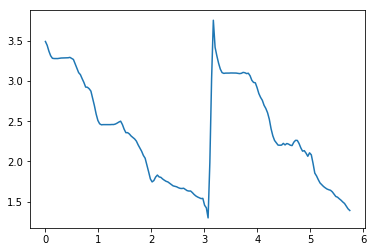

In [164]:
df_joints["magnitude_left_foot"] = np.sqrt(np.square(df_joints.FootLeftXPosition)
                                            + np.square(df_joints.FootLeftYPosition)
                                            +np.square(df_joints.FootLeftZPosition))

df_joints["magnitude_right_foot"] = np.sqrt(np.square(df_joints.FootRightXPosition)
                                            + np.square(df_joints.FootRightYPosition)
                                            +np.square(df_joints.FootRightZPosition))
                                                                                                        
df_joints

plt.plot(df_joints.index.tolist(), df_joints.magnitude_left_foot)    

,HipCenterXPosition,HipCenterYPosition,HipCenterZPosition,SpineXPosition,SpineYPosition,SpineZPosition,ShoulderCenterXPosition,ShoulderCenterYPosition,ShoulderCenterZPosition,HeadXPosition,...,FootRightYPosition,FootRightZPosition,magnitude,COM_x,COM_y,COM_z,distance_between_feet_per_frame,distance_between_ankle_per_frame,magnitude_left_foot,magnitude_right_foot
time,,,,,,,,,,,,,,,,,,,,,
0.000,0.118261,0.323182,3.431369,0.120088,0.375275,3.421978,0.129743,0.634609,3.388602,0.116209,...,-0.544084,3.669754,15.723820,0.122697,0.444356,3.413983,2.309745e-02,0.271586,3.491130,3.715206
0.033,0.116930,0.315774,3.413934,0.118543,0.368017,3.404150,0.127290,0.628716,3.367924,0.116315,...,-0.562153,3.608856,15.594117,0.120921,0.437502,3.395336,2.359170e-02,0.244905,3.443631,3.656426
0.066,0.114520,0.302084,3.383857,0.116239,0.355507,3.374256,0.125271,0.621457,3.338103,0.115294,...,-0.579030,3.535721,15.394577,0.118677,0.426349,3.365405,2.252358e-02,0.241409,3.370173,3.585240
0.099,0.111853,0.289661,3.357474,0.113706,0.344087,3.347676,0.122949,0.615012,3.311510,0.112026,...,-0.557289,3.497146,15.230527,0.116169,0.416253,3.338886,3.445104e-02,0.259417,3.313600,3.543230
0.132,0.112193,0.281370,3.334357,0.113953,0.335451,3.324942,0.122619,0.604191,3.291808,0.110248,...,-0.562322,3.456568,15.098971,0.116255,0.407004,3.317036,5.933654e-02,0.276598,3.282252,3.503647
0.165,0.107908,0.272829,3.308594,0.109813,0.326755,3.301206,0.119546,0.592709,3.275201,0.109384,...,-0.542029,3.465963,14.999742,0.112422,0.397431,3.295001,4.462671e-02,0.298769,3.279059,3.510135
0.198,0.101383,0.261155,3.274845,0.103450,0.316050,3.268008,0.114271,0.587103,3.245596,0.107382,...,-0.526883,3.487656,14.890862,0.106368,0.388103,3.262816,3.696379e-02,0.337064,3.279357,3.529535
0.231,0.094388,0.253978,3.237356,0.096907,0.310320,3.231488,0.109074,0.590839,3.213447,0.105233,...,-0.488573,3.505903,14.783047,0.100123,0.385046,3.227430,2.974110e-02,0.374084,3.278907,3.542716
0.264,0.091387,0.256054,3.208845,0.093790,0.311633,3.202576,0.105190,0.590597,3.184833,0.099425,...,-0.500550,3.499729,14.690923,0.096789,0.386095,3.198751,3.149365e-02,0.359815,3.282463,3.538062


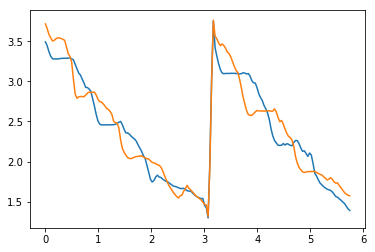

In [165]:
plt.plot(df_joints.magnitude_left_foot)
plt.plot(df_joints.magnitude_right_foot)

df_joints